# ResNet Fine-Tuned+Softmax

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
## extra imports to set GPU options
import tensorflow as tf
from keras import backend as k

###################################
# TensorFlow wizardry
config = tf.ConfigProto()

# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True

# Only allow a total of half the GPU memory to be allocated
config.gpu_options.per_process_gpu_memory_fraction = 1 # 0.5 for Half

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))


Using TensorFlow backend.


In [3]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import plot_model
import numpy
import tensorflow as tf
import keras
import seaborn as sns
import pandas as pd
import numpy as np
import linecache
import sys
import h5py
import itertools
import matplotlib.pyplot as plt
import os
import pickle
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import RemoteMonitor
from numpy import argmax
import numpy as np
from numpy.random import RandomState
np.random.seed(1)
#from sklearn.manifold import TSNE



from tsne import bh_sne
#from tsne.bh_sne import BH_SNE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
import os.path
import glob

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

In [4]:
import os
import os.path
import glob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import svm

import matplotlib.pyplot as plt
import matplotlib.cm as colormap
plt.rcParams['image.cmap'] = 'Paired'

import numpy as np
np.random.seed(1)

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
#from PIL import Image
from keras.preprocessing import image


from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input

In [5]:
tf.__version__

'1.9.0'

In [6]:
file = open('/data/danish/ImgProPython/TensorFlow-Tutorials/Ensemble-Networks/IMCEC(Paper Expriments)/Computer-and-Security(IMCEC-version1)/list_fams.pkl', 'rb')
list_fams = pickle.load(file)
file.close()
len(list_fams)

25

In [7]:
model = keras.applications.resnet50.ResNet50(weights='imagenet', include_top=True)

In [8]:
transfer_layer = model.get_layer('avg_pool')

x=Dense(25, activation='softmax')(transfer_layer.output)
resnet_finetuned = Model(inputs=model.input,
                   outputs=x)


In [7]:
train_path = '/data/danish/Data/Malimg-Gray-25-Families/Malimg_Grayscale_train/'
test_path  = '/data/danish/Data/Malimg-Gray-25-Families/Malimg_Grayscale_test/'

In [8]:
input_shape=(224,224)
batch_size=32
#save_fn='VGG16-Color='+str(input_shape[:])
#save_fn

In [9]:
datagen_train = ImageDataGenerator(
      rescale=1./255
      #rotation_range=0.1,#180,
      #width_shift_range=0.1,
      #height_shift_range=0.1,
      #shear_range=0.1,
      #zoom_range=0.1,#[0.9, 1.5],
      #horizontal_flip=True,
      #vertical_flip=True,
      #fill_mode='nearest'
                )

generator_train = datagen_train.flow_from_directory(directory=train_path,
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',#binary
                                                    #color_mode="rgb",
                                                    #save_prefix='Train_Aug',
                                                    shuffle=True,
                                                    #save_to_dir=save_to_dir,
                                                    seed=42)

steps_train = generator_train.n/ batch_size
print("Steps for Training\n\n",steps_train)

cls_train = generator_train.classes
print("Labels of samples as integer\n\n",cls_train)

Found 6527 images belonging to 25 classes.
Steps for Training

 203.96875
Labels of samples as integer

 [ 0  0  0 ..., 24 24 24]


In [10]:
datagen_test = ImageDataGenerator(rescale=1./255)

generator_test = datagen_test.flow_from_directory(directory=test_path,
                                                  target_size=input_shape,
                                                  class_mode='categorical',
                                                  #color_mode="rgb",
                                                  #save_prefix='Test_Aug',
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  seed=42)

steps_test = generator_test.n / batch_size
print("Steps for Test\n\n",steps_test)

cls_test = generator_test.classes
print("Labels of samples as integer\n\n",cls_test)

Found 2812 images belonging to 25 classes.
Steps for Test

 87.875
Labels of samples as integer

 [ 0  0  0 ..., 24 24 24]


In [6]:
from keras.models import load_model
resnet_finetuned = load_model("ResNet50-FT-Model(loss=SGD).h5")
resnet_finetuned.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
scores = resnet_finetuned.evaluate_generator(generator_test, verbose=1)# steps_test, max_queue_size=10, workers=1, use_multiprocessing=False,verbose=1)
print("%s: %.2f%%" % (resnet_finetuned.metrics_names[1], scores[1]*100))

In [13]:
import time
tic = time.time();

cls_pred = resnet_finetuned.predict_generator(generator_test, verbose=1)


toc = time.time();
print ("Elasped Time (s) = ", toc-tic);

88/88 [==============================] - 14s 158ms/step
Elasped Time (s) =  13.928672790527344


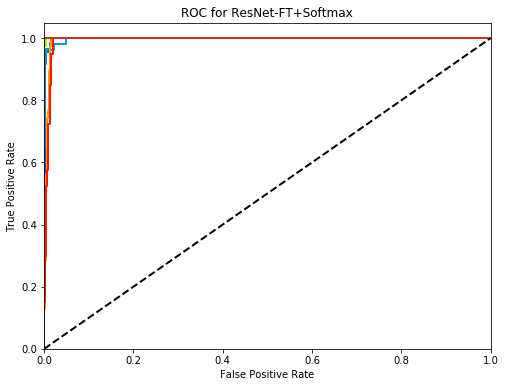

In [14]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import roc_curve

y_true = cls_test# ground truth labels
y_probas = cls_pred# predicted probabilities generated by sklearn classifier

#fpr, tpr, thresholds = roc_curve(y_true, y_probas)

figsize=(8,6)
title = "ROC for ResNet-FT+Softmax"
title_fontsize = 12
fig, ax = plt.subplots(1, 1, figsize=figsize)
text_fontsize = 10

skplt.metrics.plot_roc(y_true, y_probas,ax=ax, cmap='nipy_spectral',plot_macro=False, plot_micro=False )


#skplt.metrics.plot_roc_curve(y_true, y_probas,ax=ax, cmap='nipy_spectral' )

ax.set_title(title, fontsize=title_fontsize)
ax.get_legend().remove()
fig.savefig("ROC for ResNet-FT+Softmax.png")

In [12]:
cls_pred = np.argmax(cls_pred, axis=1)
print(cls_pred)

NameError: name 'cls_pred' is not defined

In [14]:
file = open('CM_ResNet_FT_Softmax.pkl', 'rb')
CM_ResNet_FT_Softmax = pickle.load(file)
file.close()
CM_ResNet_FT_Softmax

pycm.ConfusionMatrix(classes: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '3', '4', '5', '6', '7', '8', '9'])

In [15]:
from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(cls_test,cls_pred))  
print(classification_report(cls_test,cls_pred,target_names=list_fams)) 

                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        37
     Agent.FYI       1.00      1.00      1.00        35
     Allaple.A       1.00      1.00      1.00       885
     Allaple.L       1.00      1.00      1.00       478
 Alueron.gen!J       1.00      1.00      1.00        60
     Autorun.K       1.00      1.00      1.00        32
   C2LOP.gen!g       0.85      0.93      0.89        44
       C2LOP.P       0.86      0.90      0.88        60
Dialplatform.B       1.00      0.96      0.98        54
     Dontovo.A       1.00      1.00      1.00        49
      Fakerean       1.00      0.99      1.00       115
 Instantaccess       1.00      1.00      1.00       130
    Lolyda.AA1       0.98      1.00      0.99        64
    Lolyda.AA2       1.00      0.98      0.99        56
    Lolyda.AA3       1.00      1.00      1.00        37
     Lolyda.AT       0.96      1.00      0.98        48
   Malex.gen!J       1.00      0.98      0.99  

In [15]:
from numpy import array
from numpy import argmax
from keras.utils import to_categorical

Y_pred = to_categorical(cls_pred)
print(Y_pred.shape)

Y_test = to_categorical(cls_test)
print(Y_test.shape)


(2812, 25)
(2812, 25)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(25):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), Y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

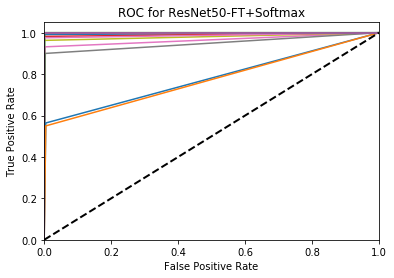

In [17]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(25)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(25):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 25

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
#plt.figure()
#plt.figure(figsize = (25,9))

#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', marker=11, linewidth=1)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', marker=5, linewidth=1)


colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,25)]  

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(25), colors):
    plt.plot(fpr[i], tpr[i], 
             label='ROC curve of Family {0} (area = {1:0.2f})'
             ''.format(list_fams[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for ResNet50-FT+Softmax')
#plt.legend(loc="lower right", fontsize='small')
plt.savefig('ROC for ResNet50-FT+Softmax.png', transparent=True)
plt.show()

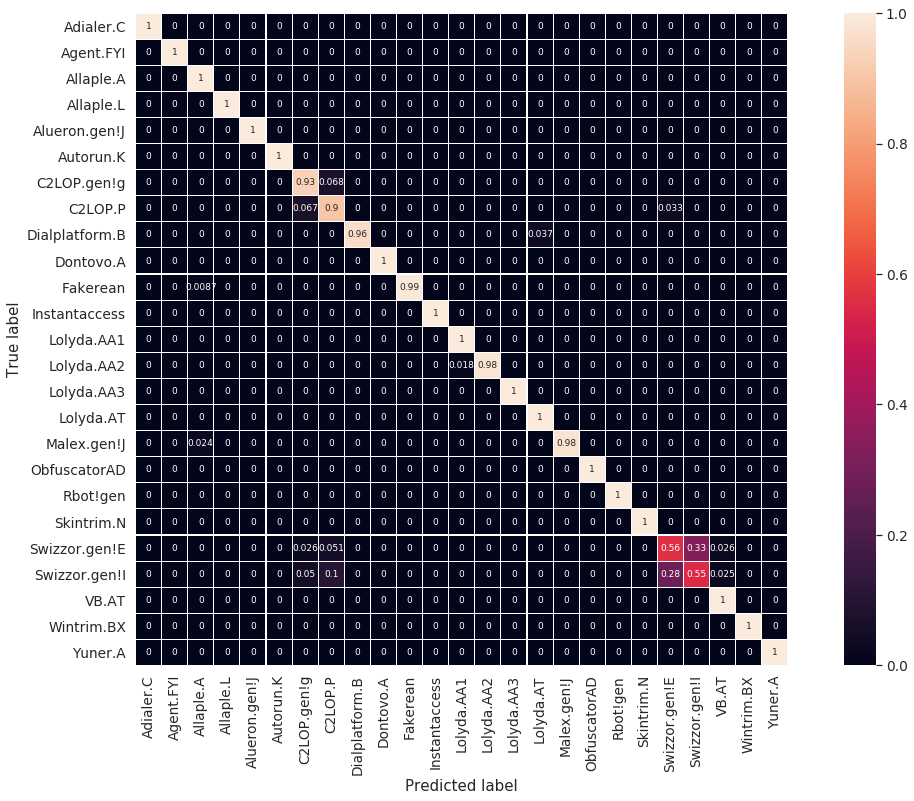

In [22]:
def plot_confusion_matrix(cls_pred):
    
    
    
    cm = confusion_matrix(y_true=cls_test, y_pred=cls_pred)
    
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    
    figure = plt.gcf()
    figure.set_size_inches(20, 12)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 annot_kws={'size': 9}, linewidth = 0.1,
                 yticklabels=list_fams, xticklabels=list_fams)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.savefig('ResNet-FT-softmax-Confusion-matrix(loss=SGD).png', bbox_inches='tight')
    plt.show()
    
plot_confusion_matrix(cls_pred=cls_pred)